For logistic with AUC only

In [50]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import os.path

In [51]:
Model = "logistic"
TrainPattern = "parallel"

# Index of the current setting
Index = 2
#batchsize = 15000
# number of transmission iterations
kNum = 50
# number of iterations
niter = 100

# number of local updates
QList = [5, 10, 25]
# factor of the proximal term
muList = [0, 0.1]

In [52]:
n = 2000
sig = 0.1
randomBeta = "True"
Xdist= "uniform"


In [53]:
infile = open("minmaxVals_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()

minval = new_dict['minval']
maxval = new_dict['maxval']

minval2 = new_dict['minval2']
maxval2 = new_dict['maxval2']

#============================List of step sizes for FedBCD================================
# number of eta0 values
numEta0s = 20 
# minval = 10**(-5)
# maxval = 0.01
#eta0List = math.e**(np.linspace(math.log(minval), math.log(maxval), num=numEta0s))[::-1]
eta0List = math.e**(np.linspace(math.log(minval), math.log(maxval), num=numEta0s))

#============================List of step sizes for FedSGD================================
# apply a set of larger step sizes
# minval2 = 10**(-5)
# maxval2 = 0.01
#eta0List = math.e**(np.linspace(math.log(minval), math.log(maxval), num=numEta0s))[::-1]
eta0List2 = math.e**(np.linspace(math.log(minval2), math.log(maxval2), num=numEta0s))



# AUC or ll
statType = "AUC"

In [54]:
def FindBestSetting(batchsize, eta0List, mu, Index, sig, Q, statType):
    values_array = []
    for eta0 in eta0List:
        fname = "VFL_result_batchsize" + str(batchsize) + "_Q_" + str(Q) + "_mu_" + str(mu)+ "_eta0_" + str(eta0)+ "TrainPattern" + TrainPattern
        path = fname +  "_dic.p"
        if os.path.isfile(path):
            infile = open(path, 'rb')
        else:
            break
        
        infile = open(path, 'rb')
        new_dict = pickle.load(infile)
        infile.close()
        value=new_dict[statType]
        LastValueMean = np.mean(value[(len(value)-1)])
        values_array.append(LastValueMean)
    return max(values_array), values_array.index(max(values_array))

In [55]:
#============================================== minibatch gradient descent batch size =32================================================
batchsize = 32
#FBCD
# collect the results without the proximal term 
mu = 0

BestVal1 = []
IndList1 = []
for Q in QList:
    Bv, ind = FindBestSetting(batchsize, eta0List, mu, Index, sig, Q, statType)
    BestVal1.append(Bv)
    IndList1.append(ind)

# collect the results with the proximal term
mu = 0.1

BestVal2 = []
IndList2 = []
for Q in QList:
    Bv, ind = FindBestSetting(batchsize, eta0List, mu, Index, sig, Q, statType)
    BestVal2.append(Bv)
    IndList2.append(ind)

if max(BestVal1) > max(BestVal2):
    bestMuInd = 0
    bestQ = QList[BestVal1.index(max(BestVal1))]
    bestEta0 = eta0List[IndList1[BestVal1.index(max(BestVal1))]]
    bestVal = max(BestVal1)
elif max(BestVal1) < max(BestVal2):
    bestMuInd = 1
    bestQ = QList[BestVal2.index(max(BestVal2))]
    bestEta0 = eta0List[IndList2[BestVal2.index(max(BestVal2))]]
    bestVal = max(BestVal2)
print("bestVal=" + str(bestVal) + ", mu=" + str(muList[bestMuInd]) + ", Q=" +str(bestQ) + ", eta0 =" + str(bestEta0)) 

# for FSGD

Bv, ind = FindBestSetting(batchsize, eta0List2, 0, Index, sig, 1, statType)
eta0FSGD = eta0List2[ind]
print("bestVal=" + str(Bv) + ", eta0=" + str(eta0FSGD))

# read the FedBCD data 
mu = muList[bestMuInd]
eta0 = bestEta0
Q = bestQ
fname = "VFL_result_batchsize" + str(batchsize) + "_Q_" + str(Q) + "_mu_" + str(mu)+ "_eta0_" + str(eta0)+ "TrainPattern" + TrainPattern
path = fname +  "_dic.p"
infile = open(path , 'rb')
new_dict = pickle.load(infile)
infile.close()
FedBCD_AUC=new_dict[statType]

# read the FedSGD data (mu = 0, Q=1)
mu = 0
eta0 = eta0FSGD
Q = 1
fname = "VFL_result_batchsize" + str(batchsize) + "_Q_" + str(Q) + "_mu_" + str(mu)+ "_eta0_" + str(eta0)+ "TrainPattern" + TrainPattern
path = fname +  "_dic.p"
infile = open(path , 'rb')
new_dict = pickle.load(infile)
infile.close()
FedSGD_AUC=new_dict[statType]

bestVal=0.9908054735795515, mu=0, Q=25, eta0 =0.6951927961775606
bestVal=0.9868912292708399, eta0=1.9999999999999998


In [56]:
#============================================== batch gradient descent ================================================
batchsize = 0
#FBCD
# collect the results without the proximal term 
mu = 0

BestVal1 = []
IndList1 = []
for Q in QList:
    Bv, ind = FindBestSetting(batchsize, eta0List, mu, Index, sig, Q, statType)
    BestVal1.append(Bv)
    IndList1.append(ind)

# collect the results with the proximal term
mu = 0.1

BestVal2 = []
IndList2 = []
for Q in QList:
    Bv, ind = FindBestSetting(batchsize, eta0List, mu, Index, sig, Q, statType)
    BestVal2.append(Bv)
    IndList2.append(ind)

if max(BestVal1) > max(BestVal2):
    bestMuInd = 0
    bestQ = QList[BestVal1.index(max(BestVal1))]
    bestEta0 = eta0List[IndList1[BestVal1.index(max(BestVal1))]]
    bestVal = max(BestVal1)
elif max(BestVal1) < max(BestVal2):
    bestMuInd = 1
    bestQ = QList[BestVal2.index(max(BestVal2))]
    bestEta0 = eta0List[IndList2[BestVal2.index(max(BestVal2))]]
    bestVal = max(BestVal2)
print("bestVal=" + str(bestVal) + ", mu=" + str(muList[bestMuInd]) + ", Q=" +str(bestQ) + ", eta0 =" + str(bestEta0)) 

# for FSGD

Bv, ind = FindBestSetting(batchsize, eta0List2, 0, Index, sig, 1, statType)
eta0FSGD = eta0List2[ind]
print("bestVal=" + str(Bv) + ", eta0=" + str(eta0FSGD))

# read the FedBCD data 
mu = muList[bestMuInd]
eta0 = bestEta0
Q = bestQ
fname = "VFL_result_batchsize" + str(batchsize) + "_Q_" + str(Q) + "_mu_" + str(mu)+ "_eta0_" + str(eta0)+ "TrainPattern" + TrainPattern
path = fname +  "_dic.p"
infile = open(path , 'rb')
new_dict = pickle.load(infile)
infile.close()
FedBCD_AUC_0=new_dict[statType]

# read the FedSGD data (mu = 0, Q=1)
mu = 0
eta0 = eta0FSGD
Q = 1
fname = "VFL_result_batchsize" + str(batchsize) + "_Q_" + str(Q) + "_mu_" + str(mu)+ "_eta0_" + str(eta0)+ "TrainPattern" + TrainPattern
path = fname +  "_dic.p"
infile = open(path , 'rb')
new_dict = pickle.load(infile)
infile.close()
FedSGD_AUC_0=new_dict[statType]

bestVal=0.9915241372080512, mu=0, Q=25, eta0 =1.0
bestVal=0.9867702432379686, eta0=1.9999999999999998


In [57]:
# read the assisted learning data
infile = open("AE_AL_result_dic.p", 'rb')
new_dict = pickle.load(infile)
infile.close()
AEAL_AUC = new_dict[statType]
oracle_AUC = new_dict["AUC_oracle"]


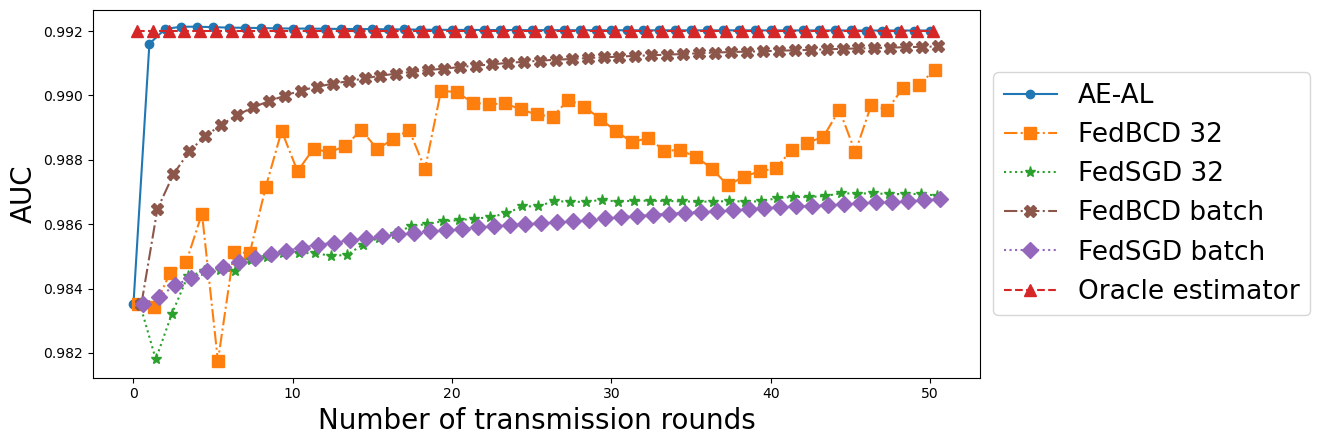

In [58]:
# number of plots
NumPlots = 1
niterList = np.array(range(kNum + 1))
#==========================Setting 1================================
fit, axes = plt.subplots(1,1, figsize = (9, 8))
fit.set_size_inches(14, 5)   
#fit.suptitle( 'Setting ' + str(Index) + ', AR(1) ' + r'$\rho=' + str(sig) + '$', fontsize=20)  
#fit.suptitle( 'Setting ' + str(Index), fontsize=20) 
#nList = ['n=300', 'n=2000']
for i in range(NumPlots):
    #axe = axes[i]
    if NumPlots == 1:
        axe = axes
    else:
        axe = axes[i]        
    
    axe.plot((niterList), AEAL_AUC, marker = 'o')
    axe.plot((niterList + 0.3), FedBCD_AUC, marker = "s", linestyle = '-.', markersize=8)
    axe.plot((niterList + 0.4),  FedSGD_AUC, marker = "*", linestyle = 'dotted', markersize=8)
    axe.plot((niterList + 0.5), FedBCD_AUC_0, marker = "X", linestyle = 'dashdot', markersize=8, color = 'tab:brown')
    axe.plot((niterList + 0.6),  FedSGD_AUC_0, marker = "D", linestyle = ':', markersize=8,  color = 'tab:purple')
    axe.plot((niterList + 0.2), np.repeat(np.mean(oracle_AUC), (kNum + 1) ), marker = "^", linestyle = '--', markersize=8, color = 'tab:red')
    

    axe.set_xlabel("Number of transmission rounds", fontsize=20)
    if statType == "AUC":
        axe.set_ylabel("AUC", fontsize=20)
    elif statType == "ll":
        axe.set_ylabel("Log-likelihood", fontsize=20)
    #axe.set_title(nList[i], fontsize=20)
    
    if i==(NumPlots - 1):
        axe.legend(['AE-AL', 'FedBCD 32', 'FedSGD 32', 'FedBCD batch', 'FedSGD batch', 'Oracle estimator'], prop={'size': 19}, loc='center left', bbox_to_anchor=(1, 0.5))
    elif i<(NumPlots - 1):
        axe.legend('',frameon=False)
plt.tight_layout(rect=[0.05, 0.04, 1, 0.95])

fname = Model + "_Setting_" + str(Index) + "_n_" + str(n) +  "_sig_" + str(sig) + "_Xdist_" + str(Xdist) +  "_randomBeta_" + randomBeta

plt.savefig('Result_Figure_MIMIC.pdf')